# DBScan in 1D

Based off of [cluster-plot-dbscan-py](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

## Make the artificial data: 1D1T

**note** "T" here means just the index; later, it could be considered "time"

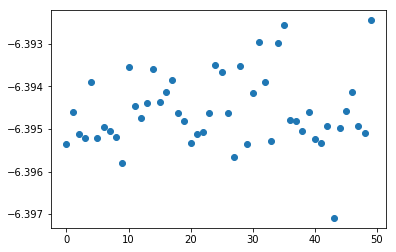

In [4]:
X, labels_true = make_blobs(n_samples=50, 
                            n_features=1, 
                            centers=1, 
                            cluster_std=0.001,
                            random_state=11)

plt.plot(X,'o')

In [15]:
labels_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Regularize the data

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

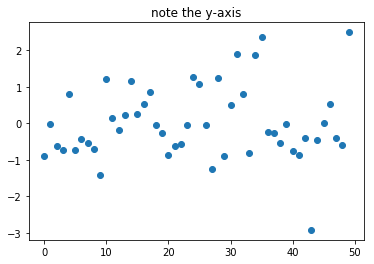

In [5]:
X = StandardScaler().fit_transform(X)

plt.plot(X,'o')
plt.title("note the y-axis");

## DBScan

### Parameters

The basic algorithmic usage
```
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
```

* `eps` : `float`, default=0.5
    * The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 
    * This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

* `min_samples` : `int`, default=5
    * The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.


The main returns
```
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
```

## Plot the findings

Check fo a few $\epsilon$s where the cluster is the best

In [6]:
indices = np.arange(0,50,1)

In [18]:
import pandas as pd

# Sythetic data

In [598]:
import importlib
import synthetic_data

In [660]:
xxx = np.arange(0,100,0.1)

In [812]:
importlib.reload(synthetic_data);
from synthetic_data import get_1bump, get_bumps, get_noisy_bumps

In [1059]:
dc = {
        "bump1_amp":  -1.5, "bump1_slope": 0.5, "bump1_start": -20 , "bump1_end": 80,
        "bump2_amp": -4.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50
     }

dc_noise = {"bump1_eta": 0.015, "bump2_eta": 0.025}

In [1060]:
yyy = get_bumps(xxx, **dc)
dc.update(dc_noise)
yyyn = get_noisy_bumps(xxx, **dc)

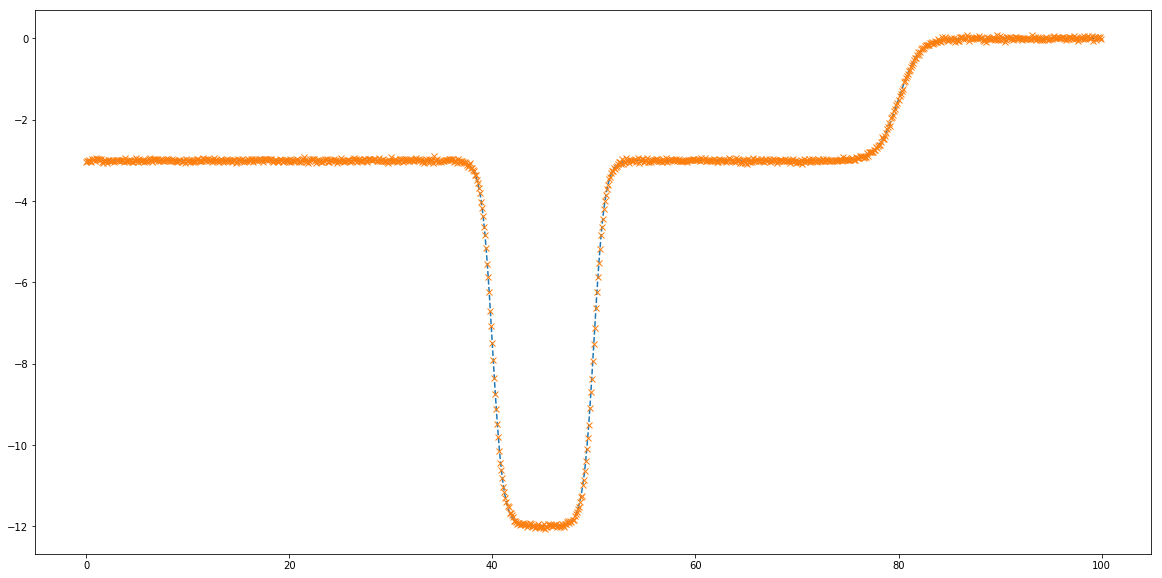

In [1061]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--')
plt.plot(xxx, yyyn, 'x')

In [1039]:
import numpy.ma as ma

mask = np.random.randint(0, high=2, size=xxx.size) * \
       np.random.randint(0, high=3, size=xxx.size)%2

remask = lambda x: int(not bool(x))

remask = lambda x: int(not bool(x))
mask = np.array(list(map(remask, mask)))

new_mask = ma.nonzero(ma.array(xxx, mask=mask))

In [1044]:
xxxx = xxx[new_mask]
yyyy = yyyn[new_mask]

In [1045]:
#new_X = np.array([[n] for n in get_noise(fff(xxxx))])
yyyy_ = yyyy.reshape(yyyy.size,1) #np.array([[n] for n in yyyy])
xxxx_ = xxxx.reshape(xxxx.size,1) #np.array([[n] for n in xxxx])

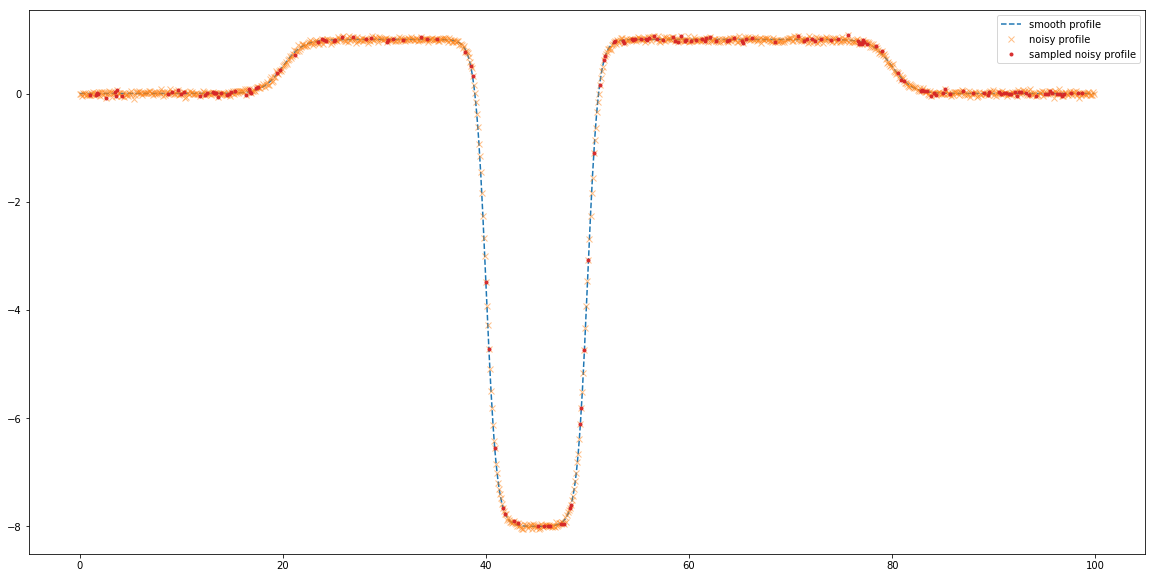

In [1046]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--', label='smooth profile')
plt.plot(xxx, yyyn, 'x', alpha=0.5, label='noisy profile')
plt.plot(xxxx, yyyn[new_mask], '.', alpha=0.95, color="C3", label='sampled noisy profile')
plt.legend();

# Clustering

## Get intial clusters

For 0.010000, nr. clusters: 2, nr noise points: 46, Silhouette Coefficient: 0.591
For 0.020000, nr. clusters: 2, nr noise points: 38, Silhouette Coefficient: 0.682
For 0.030000, nr. clusters: 3, nr noise points: 28, Silhouette Coefficient: 0.682
For 0.040000, nr. clusters: 3, nr noise points: 26, Silhouette Coefficient: 0.704
For 0.050000, nr. clusters: 3, nr noise points: 25, Silhouette Coefficient: 0.714
For 0.060000, nr. clusters: 3, nr noise points: 24, Silhouette Coefficient: 0.725
For 0.070000, nr. clusters: 3, nr noise points: 24, Silhouette Coefficient: 0.725
For 0.080000, nr. clusters: 3, nr noise points: 23, Silhouette Coefficient: 0.734
For 0.090000, nr. clusters: 3, nr noise points: 18, Silhouette Coefficient: 0.774


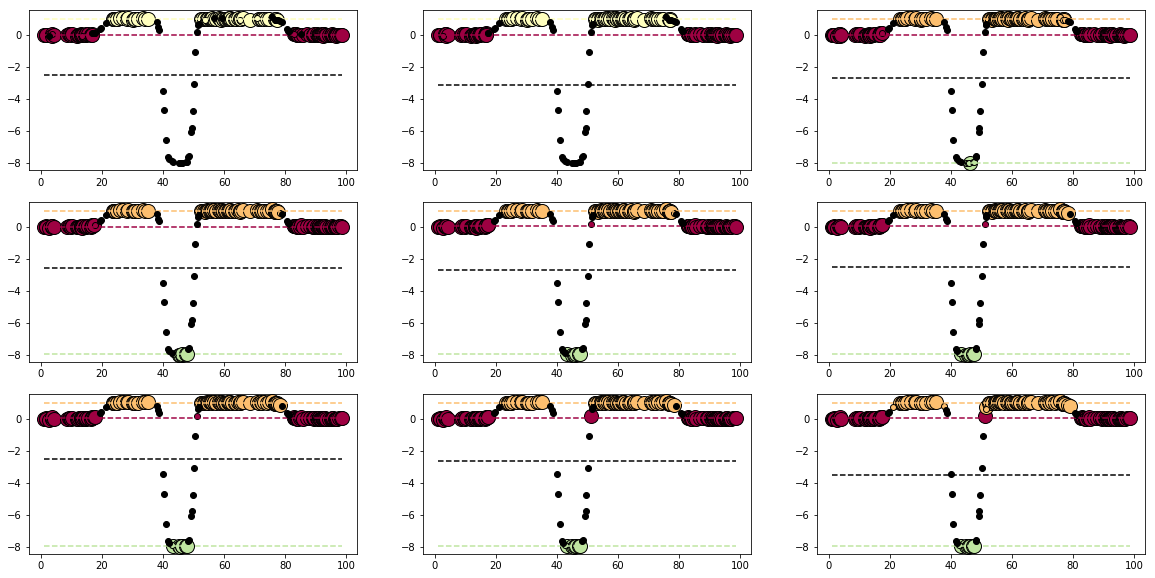

In [1047]:
fig, ax = plt.subplots(3,3, figsize=[20,10])
ax = ax.reshape(9,)

for n, eps in enumerate(np.arange(0.01,0.11,0.01)):
    '''
    if n==0: continue
    else:
        n = n-1
    '''
    
    db = DBSCAN(eps=eps, min_samples=5).fit(yyyy_)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    metric_str = 'For %f, nr. clusters: %d, nr noise points: %d' % (eps, n_clusters_, n_noise_)
    
    sil_sco = -1
    if np.unique(labels).size>1:
        sil_sco = metrics.silhouette_score(yyyy_, labels)
        add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
    else:
        add_str=''
    
    print(metric_str + add_str)
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        x = xxxx_[class_member_mask & core_samples_mask]
        y = yyyy_[class_member_mask & core_samples_mask]    
        
        #print("for",k,"size is",xy.shape)

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label='{}, big'.format(k))
        
        x = xxxx_[class_member_mask & ~core_samples_mask]
        y = yyyy_[class_member_mask & ~core_samples_mask]    
        #print("for",k,"size is",xy.shape)    

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label='{}, small'.format(k))
        
        y_mean = yyyy_[class_member_mask].mean()
        ax[n].plot([xxxx_[0],xxxx_[-1]],[y_mean, y_mean], '--', color=tuple(col), label='mean')    
    
    if n>=8: 
        break

## Split the clusters which have a temporal gap

In [1048]:
tdiff = lambda x : np.concatenate([np.array([0.0]), x[1:]-x[:-1]])

In [1049]:
time_thresh = 5.0
eps=0.05
min_samples = 5


db = DBSCAN(eps=eps, min_samples=min_samples).fit(yyyy_)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

metric_str = 'For %f, nr. clusters: %d, nr noise points: %d' % (eps, n_clusters_, n_noise_)

sil_sco = -1
if np.unique(labels).size>1:
    sil_sco = metrics.silhouette_score(yyyy_, labels)
    add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
else:
    add_str=''

print(metric_str + add_str)

# Black removed and is used for noise instead.
unique_labels = set(labels)

print('Old labels:', set(labels))

# Create a updated label for each new cluster
new_label = max(list(labels))+1

for k in unique_labels:
    
    if (k!=-1):     
    
        class_member_mask = (labels == k)
        x = xxxx_[class_member_mask]

        # Check if there are time breaks; 
        # if so, relabel the event with new class labels
        td = tdiff(x.reshape(x.size))
        td_breaks = (td > time_thresh)
    
    
        if np.any(td_breaks) & (k!=-1):       

            # Get a subset of labels 
            sublabels = labels[class_member_mask]         

            # Measure the durations between all events; look for the large gaps
            new_td_breaks = ma.nonzero(td_breaks)[0]
            print(f"time breaks: for k={k}, there are {new_td_breaks.size} break(s)")

            # for each break, get the ranges for the new labels
            lowerbound = 0
            for m in new_td_breaks:

                #print(f"for {m,lowerbound}:", x[m-1],x[lowerbound],x[m-1]-x[lowerbound])            

                if x[m-1]-x[lowerbound] <= 2.0:
                    sublabels[lowerbound:m]=-1
                else:
                    sublabels[lowerbound:m]=new_label

                lowerbound = m
                new_label += 1

            # Update the labels    
            labels[class_member_mask] = sublabels
        else:
            print('pass on ',k)
    else:
        print('do nothing for k =',k)
    
print('New labels',set(labels))

For 0.050000, nr. clusters: 3, nr noise points: 25, Silhouette Coefficient: 0.714
Old labels: {0, 1, 2, -1}
time breaks: for k=0, there are 2 break(s)
time breaks: for k=1, there are 1 break(s)
pass on  2
do nothing for k = -1
New labels {0, 1, 2, 3, 5, -1}


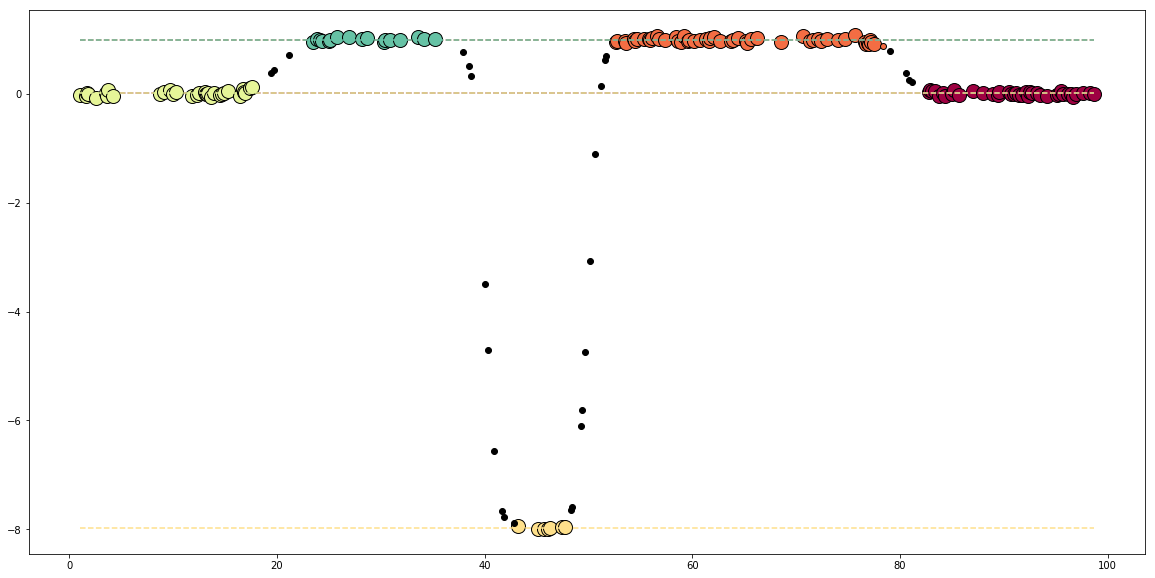

In [1050]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = xxxx_[class_member_mask & core_samples_mask]
    y = yyyy_[class_member_mask & core_samples_mask]    

    #print("for",k,"size is",xy.shape)

    ax.plot(x,y, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label='{}, big'.format(k))

    x = xxxx_[class_member_mask & ~core_samples_mask]
    y = yyyy_[class_member_mask & ~core_samples_mask]    
    #print("for",k,"size is",xy.shape)    

    ax.plot(x,y, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label='{}, small'.format(k))
    if k!=-1:
        y_mean = yyyy_[class_member_mask].mean()
        ax.plot([xxxx_[0],xxxx_[-1]],[y_mean, y_mean], '--', color=tuple(col), label='mean')    


## Refinement

In [1051]:
import random

In [1052]:
import plotting_helper
importlib.reload(plotting_helper);
from plotting_helper import plot_refined, plot_regular

In [1053]:
yyyy_[class_member_mask & ~core_samples_mask].shape

(26, 1)


For coarse cluster=0, coarse std = 0.030591,
	eps: 0.030000, nr. clusters: 1, nr noise points: 0
	fine cluster=0, fine std = 0.030590659273931817

For coarse cluster=1, coarse std = 0.040142,
	eps: 0.030000, nr. clusters: 1, nr noise points: 1, Silhouette Coefficient: 0.563
	fine cluster=0, fine std = 0.03732000970979802
	fine cluster=-1, fine std = 0.0

For coarse cluster=2, coarse std = 0.019586,
	eps: 0.030000, nr. clusters: 1, nr noise points: 1, Silhouette Coefficient: 0.238
	fine cluster=0, fine std = 0.01599055002325089
	fine cluster=-1, fine std = 0.0

For coarse cluster=3, coarse std = 0.044720,
	eps: 0.030000, nr. clusters: 1, nr noise points: 0
	fine cluster=0, fine std = 0.04472046593336754

For coarse cluster=5, coarse std = 0.027122,
	eps: 0.030000, nr. clusters: 1, nr noise points: 0
	fine cluster=0, fine std = 0.027122459596595247


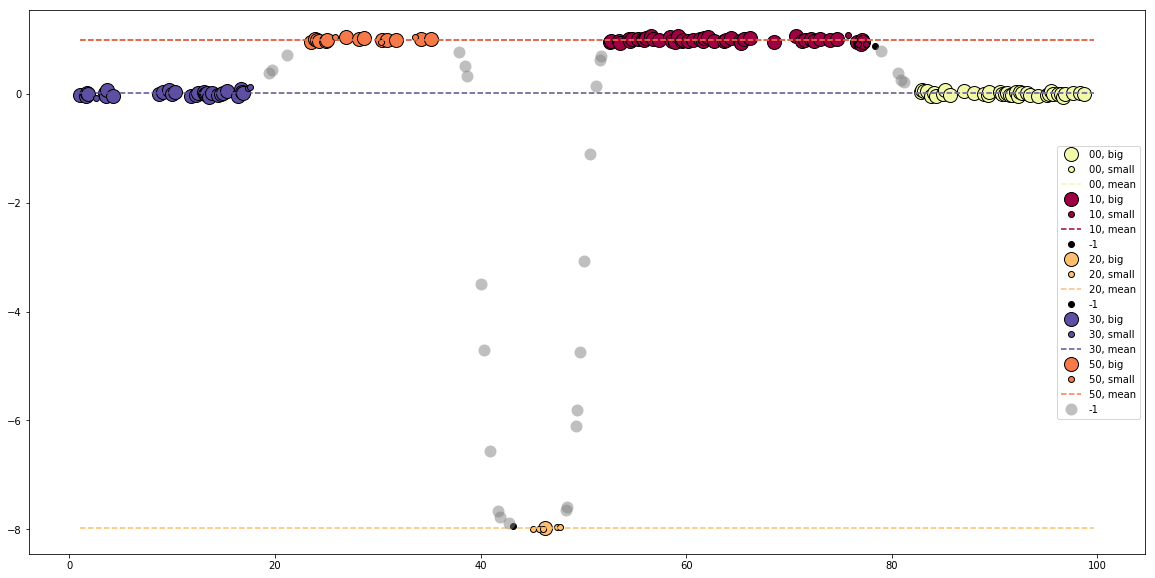

In [1055]:
eps=0.03
min_samples = 5

coarse_unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]
random.shuffle(colors)

fig, ax = plt.subplots(1,1, figsize=[20,10])

color_n = 0 
# iterate through the new labeled clusters
# redo dbscan for each cluster
# remove the outliers 
for coarse_label in coarse_unique_labels:

    if coarse_label == -1:
        
        coarse_cluster_mask = (labels == coarse_label)

        x = xxxx_[coarse_cluster_mask]
        y = yyyy_[coarse_cluster_mask]  

        ax.plot(x,y, 'o', markersize=12, 
                markerfacecolor='grey', markeredgecolor='grey', markeredgewidth=0,
                alpha=0.5, label='{}'.format(-1))
     
    else:
        # Mask the new events according the the updated labels
        coarse_cluster_mask = (labels == coarse_label)
        xx_coarse = xxxx_[coarse_cluster_mask]
        yy_coarse = yyyy_[coarse_cluster_mask]   
        coarse_std = np.std(yy_coarse)
        
        #print(xx_coarse.size, yy_coarse.size)
        
        # don't need to do this? or check this?
        #newnew_X = StandardScaler().fit_transform(yy_coarse)
        newnew_X = yy_coarse
        #print(newnew_X.size)    

        # Rerun DBScan with a smaller eps-param?
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(yy_coarse)
        fine_core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        fine_core_samples_mask[db.core_sample_indices_] = True
        fine_cluster_labels = db.labels_

        fine_n_clusters_ = len(set(fine_cluster_labels)) - (1 if -1 in fine_cluster_labels else 0)
        fine_n_noise_ = list(fine_cluster_labels).count(-1)

        metric_str = '\nFor coarse cluster=%d, coarse std = %f,\n\teps: %f, nr. clusters: %d, nr noise points: %d' \
            % (coarse_label, coarse_std, eps, fine_n_clusters_, fine_n_noise_)

        sil_sco = -1
        if np.unique(fine_cluster_labels).size>1:
            sil_sco = metrics.silhouette_score(yy_coarse, fine_cluster_labels)
            add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
        else:
            add_str=''

        print(metric_str + add_str)

        fine_unique_labels = set(fine_cluster_labels)

        # Loop over the new refined clusters to exclude the noise
        # Black removed and is used for noise instead.
        col = colors[color_n]

        for fine_label in fine_unique_labels:

            if fine_label==-1:
                
                col = [0, 0, 0, 1]                
                fine_cluster_mask = (fine_cluster_labels == -1)
                x = xx_coarse[fine_cluster_mask]
                y = yy_coarse[fine_cluster_mask]  

                ax.plot(x,y, 'o', markerfacecolor=tuple(col),
                             markeredgecolor='k', markersize=6, label=f'{fine_label}')
                    
                fine_std = np.std(y)
                
            else:

                fine_cluster_mask = (fine_cluster_labels == fine_label)

                x = xx_coarse[fine_cluster_mask & fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & fine_core_samples_mask]    

                ax.plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14, label='{}{}, big'.format(coarse_label, fine_label))

                x = xx_coarse[fine_cluster_mask & ~fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & ~fine_core_samples_mask]  

                ax.plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6, label='{}{}, small'.format(coarse_label, fine_label))

                y_mean = yy_coarse[fine_cluster_mask].mean()
                ax.plot([new_xxxx[0],new_xxxx[-1]],[y_mean, y_mean], '--', color=tuple(col), label='{}{}, mean'.format(coarse_label, fine_label))    

                fine_std = np.std(yy_coarse[fine_cluster_mask])
        
            print(f"\tfine cluster={fine_label}, fine std = {fine_std}")
        
        color_n += 1
    plt.legend()